In [ ]:
# prompt: Bfs in python

from collections import deque

def bfs(graph, start, visited=None):
  """
  Performs a breadth-first search on a graph starting from a given node.

  Args:
    graph: A dictionary representing the graph, where each key is a node and its
      value is a list of its neighbors.
    start: The starting node for the search.
    visited: A set of already visited nodes (optional).

  Returns:
    A list of nodes in the order they were visited.
  """

  if visited is None:
    visited = set()

  queue = deque([start])
  visited.add(start)

  while queue:
    node = queue.popleft()
    yield node

    for neighbor in graph[node]:
      if neighbor not in visited:
        queue.append(neighbor)
        visited.add(neighbor)

# Example usage:
graph = {
  'A': ['B', 'C'],
  'B': ['D', 'E'],
  'C': ['F'],
  'D': [],
  'E': ['F'],
  'F': []
}

for node in bfs(graph, 'A'):
  print(node)


A
B
C
D
E
F


In [ ]:
# prompt: dfs in python

from collections import deque


def dfs(graph, start, visited=None):
  """
  Performs a depth-first search on a graph starting from a given node.

  Args:
    graph: A dictionary representing the graph, where each key is a node and its
      value is a list of its neighbors.
    start: The starting node for the search.
    visited: A set of already visited nodes (optional).

  Returns:
    A list of nodes in the order they were visited.
  """

  if visited is None:
    visited = set()

  stack = deque([start])
  visited.add(start)

  while stack:
    node = stack.pop()
    yield node

    for neighbor in graph[node]:
      if neighbor not in visited:
        stack.append(neighbor)
        visited.add(neighbor)

# Example usage:
graph = {
  'A': ['B', 'C'],
  'B': ['D', 'E'],
  'C': ['F'],
  'D': [],
  'E': ['F'],
  'F': []
}

for node in dfs(graph, 'A'):
  print(node)


In [ ]:
# prompt: best first search in python

from queue import PriorityQueue

def best_first_search(graph, start, goal, heuristic):
  """
  Performs a best-first search on a graph to find the shortest path from a start
  node to a goal node.

  Args:
    graph: A dictionary representing the graph, where each key is a node and its
      value is a list of its neighbors.
    start: The starting node for the search.
    goal: The goal node for the search.
    heuristic: A function that estimates the distance from a node to the goal.

  Returns:
    A list of nodes representing the shortest path from the start node to the goal
    node, or None if no path exists.
  """

  frontier = PriorityQueue()
  frontier.put((heuristic(start), start))
  visited = set()
  parent = {} # Initialize parent dictionary to store path information
  parent[start] = None # Start node has no parent

  while frontier:
    current_cost, current_node = frontier.get()

    if current_node == goal:
      path = []
      while current_node:
        path.append(current_node)
        current_node = parent[current_node]
      return path[::-1]

    visited.add(current_node)

    for neighbor in graph[current_node]:
      if neighbor not in visited:
        total_cost = current_cost + heuristic(neighbor)
        frontier.put((total_cost, neighbor))
        parent[neighbor] = current_node # Record parent of the neighbor

  return None

# Example usage:
graph = {
  'A': ['B', 'C'],
  'B': ['D', 'E'],
  'C': ['F'],
  'D': [],
  'E': ['F'],
  'F': []
}

heuristic = lambda node: abs(ord(node) - ord('F'))

for node in best_first_search(graph, 'A', 'F', heuristic):
  print(node)

A
C
F


In [ ]:
# prompt: knn in python

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Load the training data
X_train = np.array([[1, 2], [2, 3], [3, 1], [4, 4], [5, 5]])
y_train = np.array([0, 0, 1, 1, 1])

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Load the test data
X_test = np.array([[2, 2], [3, 3], [4, 5]])

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Print the predicted labels
print(y_pred)


[0 1 1]


In [ ]:
# prompt: Linear regression in python

import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the predictions
print(y_pred)


[ 6.  8.  9. 11.]


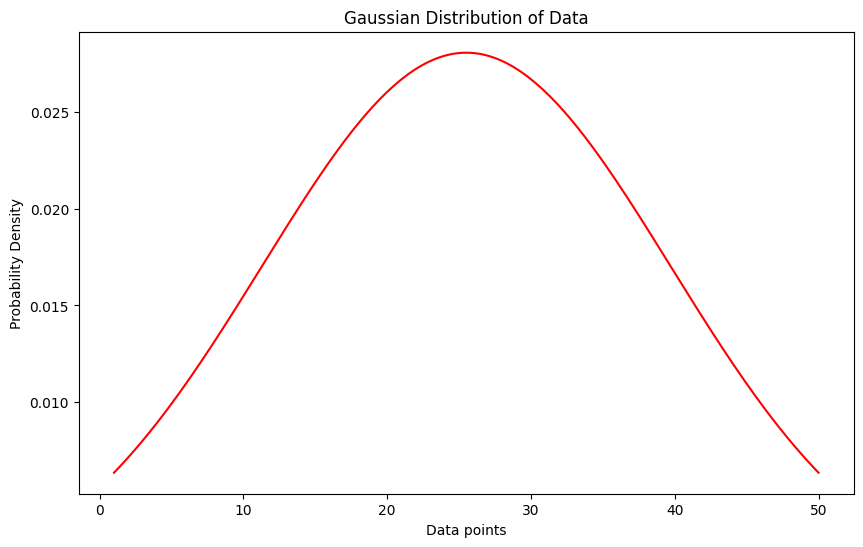

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)

#Creating a Function.
def gaussian_dist(x, mean, sd):
    prob_density = (1/(sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)

#Apply function to the data.
pdf = gaussian_dist(x, mean, sd)

#Plotting the Results
plt.figure(figsize=(10,6))
plt.plot(x, pdf, color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution of Data')
plt.show()


GAUSSIAN

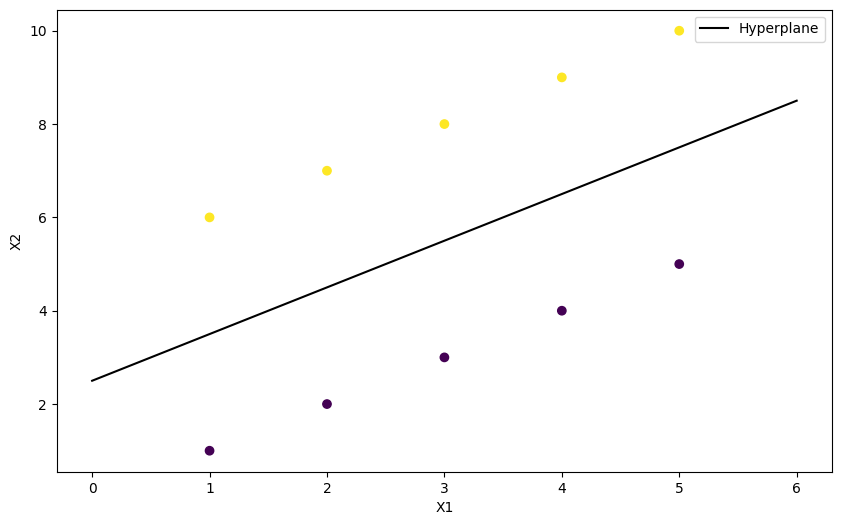

In [ ]:
# prompt: Support vector machine in python with hyper plane

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create some data
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [1, 6], [2, 7], [3, 8], [4, 9], [5, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Create a support vector classifier
clf = SVC(kernel='linear', C=1.0)

# Train the classifier
clf.fit(X, y)

# Create a hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 6)
yy = a * xx - clf.intercept_[0] / w[1]

# Plot the data and the hyperplane
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


SVM.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


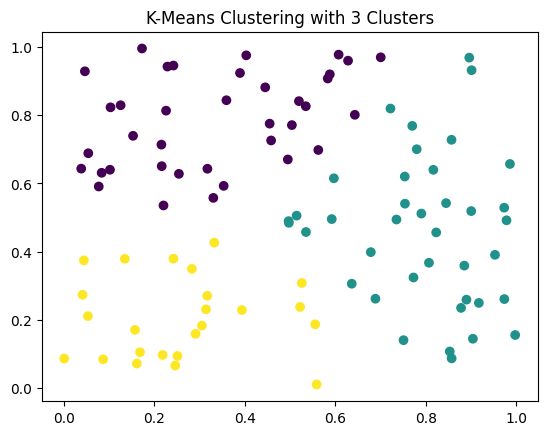

In [ ]:
 #prompt: K means clustering plot

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
X = np.random.rand(100, 2)

# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# Fit the model to the data
model.fit(X)

# Get the cluster labels
labels = model.labels_

# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()#


In [ ]:
# prompt: naviye bayes

from sklearn.naive_bayes import GaussianNB

# Load the training data
X_train = np.array([[1, 2], [2, 3], [3, 1], [4, 4], [5, 5]])
y_train = np.array([0, 0, 1, 1, 1])

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Load the test data
X_test = np.array([[2, 2], [3, 3], [4, 5]])

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Print the predicted labels
print(y_pred)


[0 1 1]
